In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating dataframes with missing values
item_data = {
    'Item_ID': [1, 2, 3],
    'Item_Name': ['FootBall', 'Knife', 'Tablet'],
    'Category': ['Sports', 'Electronics', 'Electronics'],
    'Brand': ['Kipsta', 'Pigeon', 'Sony']
}
item_df = pd.DataFrame(item_data)

time_data = {
    'Time_ID': [1, 2, 3],
    'Date': pd.date_range(start='2023-01-01', periods=3, freq='D'),
    'Month': ['January', 'January', 'March'],
    'Quarter': ['Q1', 'Q1', 'Q3'],
    'Year': [2023, 2023, 2023]
}
time_df = pd.DataFrame(time_data)

store_data = {
    'Store_ID': [1, 2, 3],
    'Store_Name': ['Decathlon', 'Big Bazaar', 'Reliance Digital'],
    'Location': ['Banglore', 'Coimbatore', 'Hosur'],
    'Region': ['North', 'South', 'West']
}
store_df = pd.DataFrame(store_data)

sales_data = {
    'Sales_ID': [1, 2, 3],
    'Item_ID': [1, 2, 3],
    'Time_ID': [1, 2, 3],
    'Store_ID': [1, 2, 3],
    'Units_Sold': [1000, 200, np.nan],  # Introducing a NaN value
    'Revenue': [500000, np.nan, 300000]  # Introducing a NaN value
}
sales_df = pd.DataFrame(sales_data)


In [2]:
print("Missing Values in Sales Data:\n", sales_df.isna().sum())


Missing Values in Sales Data:
 Sales_ID      0
Item_ID       0
Time_ID       0
Store_ID      0
Units_Sold    1
Revenue       1
dtype: int64


In [3]:
# Dropping rows with any missing values
cleaned_sales_df = sales_df.dropna()
print("Sales Data after Dropping Missing Values:\n", cleaned_sales_df)


Sales Data after Dropping Missing Values:
    Sales_ID  Item_ID  Time_ID  Store_ID  Units_Sold   Revenue
0         1        1        1         1      1000.0  500000.0


In [4]:
# Calculate statistics
mean_units_sold = sales_df['Units_Sold'].mean()
median_units_sold = sales_df['Units_Sold'].median()
mode_units_sold = sales_df['Units_Sold'].mode()[0]
std_units_sold = sales_df['Units_Sold'].std()
variance_units_sold = sales_df['Units_Sold'].var()

print(f"Mean: {mean_units_sold}, Median: {median_units_sold}, Mode: {mode_units_sold}, Std Dev: {std_units_sold}, Variance: {variance_units_sold}")

# Fill missing values with mean, median, and mode
sales_df_filled_mean = sales_df.fillna({'Units_Sold': mean_units_sold, 'Revenue': sales_df['Revenue'].mean()})
print("\nSales Data after Filling Missing Values with Mean:\n", sales_df_filled_mean)


Mean: 600.0, Median: 600.0, Mode: 200.0, Std Dev: 565.685424949238, Variance: 320000.0

Sales Data after Filling Missing Values with Mean:
    Sales_ID  Item_ID  Time_ID  Store_ID  Units_Sold   Revenue
0         1        1        1         1      1000.0  500000.0
1         2        2        2         2       200.0  400000.0
2         3        3        3         3       600.0  300000.0


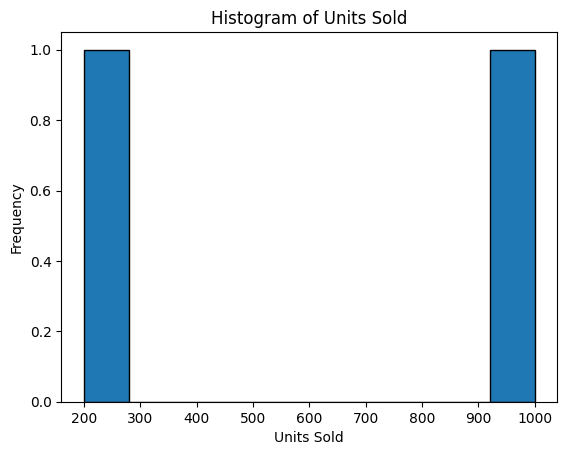

In [5]:
# Histogram for Units Sold
plt.hist(sales_df['Units_Sold'].dropna(), bins=10, edgecolor='black')
plt.title('Histogram of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()


In [6]:
# Random sampling of 2 rows
sampled_df = sales_df.sample(n=2, random_state=1)
print("\nSampled Data:\n", sampled_df)



Sampled Data:
    Sales_ID  Item_ID  Time_ID  Store_ID  Units_Sold   Revenue
0         1        1        1         1      1000.0  500000.0
2         3        3        3         3         NaN  300000.0


In [7]:
# Compute covariance matrix
cov_matrix = sales_df[['Units_Sold', 'Revenue']].cov()
print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
             Units_Sold       Revenue
Units_Sold    320000.0           NaN
Revenue            NaN  2.000000e+10


In [8]:
# Square root transformation
sales_df['Units_Sold_Sqrt'] = np.sqrt(sales_df['Units_Sold'].fillna(mean_units_sold))
print("\nSquare Root Transformation:\n", sales_df[['Units_Sold', 'Units_Sold_Sqrt']])



Square Root Transformation:
    Units_Sold  Units_Sold_Sqrt
0      1000.0        31.622777
1       200.0        14.142136
2         NaN        24.494897


In [9]:
# Cube root transformation
sales_df['Units_Sold_CubeRoot'] = np.cbrt(sales_df['Units_Sold'].fillna(mean_units_sold))
print("\nCube Root Transformation:\n", sales_df[['Units_Sold', 'Units_Sold_CubeRoot']])



Cube Root Transformation:
    Units_Sold  Units_Sold_CubeRoot
0      1000.0            10.000000
1       200.0             5.848035
2         NaN             8.434327


In [10]:
# Log transformation (adding a small constant to avoid log(0))
sales_df['Units_Sold_Log'] = np.log1p(sales_df['Units_Sold'].fillna(mean_units_sold))
print("\nLog Transformation:\n", sales_df[['Units_Sold', 'Units_Sold_Log']])



Log Transformation:
    Units_Sold  Units_Sold_Log
0      1000.0        6.908755
1       200.0        5.303305
2         NaN        6.398595


In [11]:
def min_max_normalization(series):
    return (series - series.min()) / (series.max() - series.min())

sales_df['Units_Sold_MinMax'] = min_max_normalization(sales_df['Units_Sold'].fillna(mean_units_sold))
print("\nMin-Max Normalization:\n", sales_df[['Units_Sold', 'Units_Sold_MinMax']])



Min-Max Normalization:
    Units_Sold  Units_Sold_MinMax
0      1000.0                1.0
1       200.0                0.0
2         NaN                0.5


In [12]:
def z_score_normalization(series):
    return (series - series.mean()) / series.std()

sales_df['Units_Sold_ZScore'] = z_score_normalization(sales_df['Units_Sold'].fillna(mean_units_sold))
print("\nZ-Score Normalization:\n", sales_df[['Units_Sold', 'Units_Sold_ZScore']])



Z-Score Normalization:
    Units_Sold  Units_Sold_ZScore
0      1000.0                1.0
1       200.0               -1.0
2         NaN                0.0


In [13]:
def decimal_scaling_normalization(series):
    return series / 10**np.floor(np.log10(series.abs().max()) + 1)

sales_df['Units_Sold_DecimalScaling'] = decimal_scaling_normalization(sales_df['Units_Sold'].fillna(mean_units_sold))
print("\nDecimal Scaling Normalization:\n", sales_df[['Units_Sold', 'Units_Sold_DecimalScaling']])



Decimal Scaling Normalization:
    Units_Sold  Units_Sold_DecimalScaling
0      1000.0                       0.10
1       200.0                       0.02
2         NaN                       0.06


In [14]:
#ERORR CODE 

from sklearn.linear_model import LinearRegression

# Preparing the data for linear regression
X = sales_df[['Units_Sold_ZScore']].dropna()
y = sales_df['Revenue'].dropna()

# Linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
sales_df['Revenue_Predicted'] = model.predict(X)

print("\nLinear Regression Predictions:\n", sales_df[['Units_Sold_ZScore', 'Revenue', 'Revenue_Predicted']])


ValueError: Found input variables with inconsistent numbers of samples: [3, 2]

In [ ]:
#EORR CODE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Preparing the data
features = sales_df[['Units_Sold', 'Revenue']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print("\nPCA Result:\n", pca_df)

# Scatter plot for PCA result
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
